In [1]:
import pickle
import numpy as np
import pandas as pd

In [2]:
Asset_PATH = "/home/zhimin90/DePaul/CSC695/Github/CSC695-Masters-Research-on-Neural-Network-Time-Series-Attention-Models/Asset/"

#### Load Gaussian KDE timeseries

In [3]:
density_matrix_t_series = pickle.load(open(Asset_PATH  + 'density_matrix_t_series_500x500.pickle', 'rb'))

In [4]:
density_matrix_t_series.shape

(198, 500, 500)

In [5]:
print(np.max(density_matrix_t_series))
print(np.min(density_matrix_t_series))

1376.5672531534574
-1.1156221503685051e-13


In [6]:
density_matrix_t_series.shape[0]

198

In [7]:
train, valid = (60,20)
test = 20

total_len = density_matrix_t_series.shape[0]
train_index = range(0,int(train/100*total_len))

In [8]:
valid_index = range(train_index[-1]+1,train_index[-1] + int(valid/100*total_len))
test_index = range(valid_index[-1]+1,valid_index[-1] + int(test/100*total_len))

In [9]:
flattened_matrix_np = np.reshape(density_matrix_t_series, 
                                 (density_matrix_t_series.shape[0],
                                  density_matrix_t_series.shape[1]*density_matrix_t_series.shape[2]))
flattened_matrix_np.shape

(198, 250000)

In [10]:
np.max(flattened_matrix_np[train_index])

1304.4451089207516

In [11]:
scaler_max = np.max(flattened_matrix_np[train_index])
scaler_min = np.min(flattened_matrix_np[train_index])

X_train = (flattened_matrix_np[train_index] - scaler_min)/(scaler_max - scaler_min)


In [12]:
X_train = X_train.reshape(X_train.shape[0],
                          1,    
                          X_train.shape[1])
X_train.shape

(118, 1, 250000)

In [13]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],int(X_train.shape[2]**(1/2)),int(X_train.shape[2]**(1/2)),1)
X_train.shape

(118, 1, 500, 500, 1)

In [14]:
print(np.max(X_train))
print(np.min(X_train))

1.0
0.0


#### We transform the whole train, valid, test based on scaler fitted on train

In [15]:
np.max(flattened_matrix_np)

1376.5672531534574

In [16]:
flattened_matrix_np.dtype

dtype('float64')

In [17]:
scaled_flattened_matrix = (flattened_matrix_np - scaler_min)/(scaler_max - scaler_min)

In [18]:
flattened_matrix_np.shape

(198, 250000)

In [19]:
scaled_flattened_matrix.shape

(198, 250000)

In [20]:
np.where(scaled_flattened_matrix > 10)

(array([], dtype=int64), array([], dtype=int64))

In [21]:
flattened_matrix_np[118,33433]

0.0003376003735987424

In [22]:
scaled_flattened_matrix[118,33433]

2.5880765039597745e-07

In [23]:
print(np.max(scaled_flattened_matrix))
print(np.min(scaled_flattened_matrix))

1.0552895202254826
0.0


#### We reshape to (sample, timestep, inputshape)

In [24]:
scaled_flattened_matrix = scaled_flattened_matrix.reshape(scaled_flattened_matrix.shape[0],
                                                           1,
                                                           scaled_flattened_matrix.shape[1])
scaled_flattened_matrix.shape

(198, 1, 250000)

#### We set the target to be 7 days aggregated KDE or 1 single frame forward

In [25]:
def reshape(X_set):
    if len(X_set.shape)>2:
        return X_set.reshape(X_set.shape[0],
                             X_set.shape[1],
                             int(X_set.shape[2]**(1/2)),int(X_set.shape[2]**(1/2)),1)
    else:
        return X_set.reshape(X_set.shape[0],int(X_set.shape[1]**(1/2)),int(X_set.shape[1]**(1/2)),1)

In [26]:
Y_train = scaled_flattened_matrix[np.array(train_index)+1].reshape(
    scaled_flattened_matrix[np.array(train_index)+1].shape[0],scaled_flattened_matrix[np.array(train_index)+1].shape[2])
#Y_train = reshape(Y_train)

X_valid = scaled_flattened_matrix[np.array(valid_index)]
X_valid = reshape(X_valid)

Y_valid = scaled_flattened_matrix[np.array(valid_index)+1].reshape(
    scaled_flattened_matrix[np.array(valid_index)+1].shape[0],scaled_flattened_matrix[np.array(valid_index)+1].shape[2])
#Y_valid = reshape(Y_valid)

X_test = scaled_flattened_matrix[np.array(test_index)]
X_test = reshape(X_test)

Y_test = scaled_flattened_matrix[np.array(test_index)+1].reshape(
    scaled_flattened_matrix[np.array(test_index)+1].shape[0],scaled_flattened_matrix[np.array(test_index)+1].shape[2])
#Y_test = reshape(Y_test)

In [27]:
print(X_train[0:2])
print('-'*100)
print(Y_train[0])

[[[[[8.12321585e-17]
    [8.09930489e-17]
    [8.06092709e-17]
    ...
    [8.34700899e-17]
    [8.40057474e-17]
    [8.43639394e-17]]

   [[8.06441777e-17]
    [8.14045982e-17]
    [8.20716042e-17]
    ...
    [8.32796997e-17]
    [8.34750980e-17]
    [8.45655654e-17]]

   [[7.83087652e-17]
    [7.82554211e-17]
    [7.99920988e-17]
    ...
    [7.93122549e-17]
    [7.96093825e-17]
    [8.03617882e-17]]

   ...

   [[8.11629885e-17]
    [8.07265227e-17]
    [8.10887389e-17]
    ...
    [8.30332811e-17]
    [8.33472118e-17]
    [8.39991990e-17]]

   [[8.43633253e-17]
    [8.37326263e-17]
    [8.33673748e-17]
    ...
    [8.24431394e-17]
    [8.27789793e-17]
    [8.31071626e-17]]

   [[8.64787219e-17]
    [8.58242011e-17]
    [8.54787490e-17]
    ...
    [8.52050047e-17]
    [8.57013970e-17]
    [8.58645788e-17]]]]



 [[[[8.81826796e-17]
    [8.75643052e-17]
    [8.65007782e-17]
    ...
    [9.06523126e-17]
    [9.08102185e-17]
    [9.03362507e-17]]

   [[8.53153084e-17]
    [8.62142792

In [28]:
print(X_valid[0:2])
print('-'*100)
print(Y_valid[0])

[[[[[8.70214962e-17]
    [8.73210668e-17]
    [8.80642341e-17]
    ...
    [8.73355447e-17]
    [8.77599661e-17]
    [8.70777175e-17]]

   [[8.28472269e-17]
    [8.37461790e-17]
    [8.50141885e-17]
    ...
    [8.37419806e-17]
    [8.48074214e-17]
    [8.51124933e-17]]

   [[8.20031405e-17]
    [8.18877837e-17]
    [8.20265656e-17]
    ...
    [8.49793227e-17]
    [8.51233676e-17]
    [8.56937428e-17]]

   ...

   [[8.15679661e-17]
    [8.20359397e-17]
    [8.32880351e-17]
    ...
    [8.98107137e-17]
    [8.91339567e-17]
    [8.77974708e-17]]

   [[8.43729932e-17]
    [8.46887062e-17]
    [8.52713423e-17]
    ...
    [8.55857815e-17]
    [8.57208775e-17]
    [8.53765063e-17]]

   [[8.77184968e-17]
    [8.79419103e-17]
    [8.65964991e-17]
    ...
    [8.84076051e-17]
    [9.02798182e-17]
    [9.05385656e-17]]]]



 [[[[8.36619199e-17]
    [8.20291365e-17]
    [8.21814850e-17]
    ...
    [8.25357214e-17]
    [8.38515872e-17]
    [8.55404971e-17]]

   [[8.36819915e-17]
    [8.39861755

In [29]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X_test.shape)
print(Y_test.shape)

(118, 1, 500, 500, 1)
(118, 250000)
(38, 1, 500, 500, 1)
(38, 250000)
(38, 1, 500, 500, 1)
(38, 250000)


In [30]:
import os, datetime
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, GaussianNoise, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate, Input, LSTM, RepeatVector, TimeDistributed
import tensorflow.keras.layers as layers

In [31]:
checkpoint_filepath = Asset_PATH+'checkpoints/'

## 2D CNN LSTM model

In [43]:
serie_size, time_step, n_features_row, n_features_column, no_channel = X_train.shape

epochs = 100
batch = 48
lr = .001
loss='mae'
METRIC_ACCURACY = 'mae'

model = Sequential()


model.add(
    TimeDistributed(
        Conv2D(15, (2,2), activation='relu', 
               padding='same', 
               input_shape=(n_features_row, n_features_column, no_channel)),
               input_shape=(time_step,n_features_row, n_features_column, no_channel)))

model.add(
    TimeDistributed(
        MaxPooling2D(pool_size=(2, 2))))

model.add(TimeDistributed(Flatten()))
#model.add(TimeDistributed(Flatten(),input_shape=(time_step,n_features_row, n_features_column, no_channel)))

model.add(LSTM(50))
model.add(Dense(100, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dense(Y_train.shape[1]))

model.summary()

adam = optimizers.Adam(lr)
model.compile(loss='mean_absolute_error',
                   metrics=['mae'], 
                   optimizer=adam)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_2 (TimeDist (None, 1, 500, 500, 15)   75        
_________________________________________________________________
time_distributed_3 (TimeDist (None, 1, 250, 250, 15)   0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 1, 937500)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                187510200 
_________________________________________________________________
dense_2 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_3 (Dense)              (None, 250000)            25250000  
Total params: 212,765,375
Trainable params: 212,765,375
Non-trainable params: 0
________________________________________

In [44]:
EPOCHS = 5

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
    min_delta=0,
    patience=EPOCHS*10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,)

logdir = os.path.join("./logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_cbk = tf.keras.callbacks.TensorBoard(log_dir=logdir)

modelfilename = checkpoint_filepath + '_'+\
                    datetime.datetime.now().strftime("%Y%m%d-%H%M%S")\
                    + "_model.hdf5"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    modelfilename,
    save_weights_only=False,
    monitor='val_mae',#'val_accuracy',
    mode='min',
    verbose=1,
    period = 1,
    save_best_only=True)



model_history = model.fit(X_train,Y_train, 
                             validation_data=(X_valid, Y_valid),
                             epochs=20, 
                             batch_size=10, 
                             #callbacks=[tensorboard_cbk,
                             #hp.KerasCallback(logdir, hparams),
                             #earlystop_callback,
                             #model_checkpoint_callback]
                                   )

Train on 118 samples, validate on 38 samples
Epoch 1/20
 10/118 [=>............................] - ETA: 1:59

InternalError:  [_Derived_]  Failed to call ThenRnnBackward with model config: [rnn_mode, rnn_input_mode, rnn_direction_mode]: 2, 0, 0 , [num_layers, input_size, num_units, dir_count, max_seq_length, batch_size, cell_num_units]: [1, 937500, 50, 1, 1, 10, 50] 
	 [[{{node gradients/CudnnRNN_grad/CudnnRNNBackprop}}]]
	 [[StatefulPartitionedCall]] [Op:__inference_distributed_function_8401]

Function call stack:
distributed_function -> distributed_function -> distributed_function


In [36]:
valid_loss, valid_acc = model.evaluate(X_valid, Y_valid, verbose=2) # 5/2020 nt: use validation set
print ("valid_accuracy_MAE=%s, valid_loss=%s" % (valid_acc, valid_loss))

38/38 - 0s - loss: 0.0013 - mae: 0.0013
valid_accuracy_MAE=0.001285538, valid_loss=0.0012855379486848648


In [37]:
Predict = model.predict(X_valid)

In [38]:
Predict.shape

(38, 250000)

In [39]:
int(Predict[-1].shape[0]**(1/2)),int(Predict[-1].shape[0]**(1/2))

(500, 500)

In [40]:
def reshapePred(Predict):
    return np.rot90(Predict[-1].reshape(int(Predict[-1].shape[0]**(1/2)),int(Predict[-1].shape[0]**(1/2))))

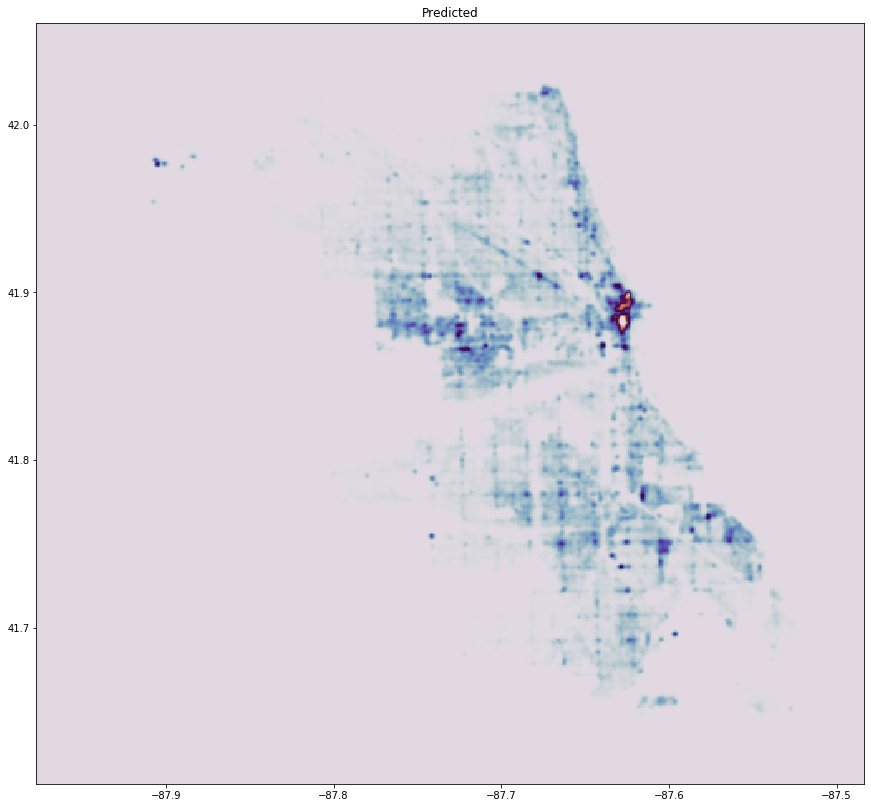

In [41]:
import matplotlib.pyplot as plt
grid_size = 500
density_matrix_t_series = []
# Define the borders
x = [-87.9361,-87.5245]
y = [41.6447,42.023]
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
plt.figure(figsize=(18, 14))
plt.title('Predicted')
plt.imshow( X=reshapePred(Predict), cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])

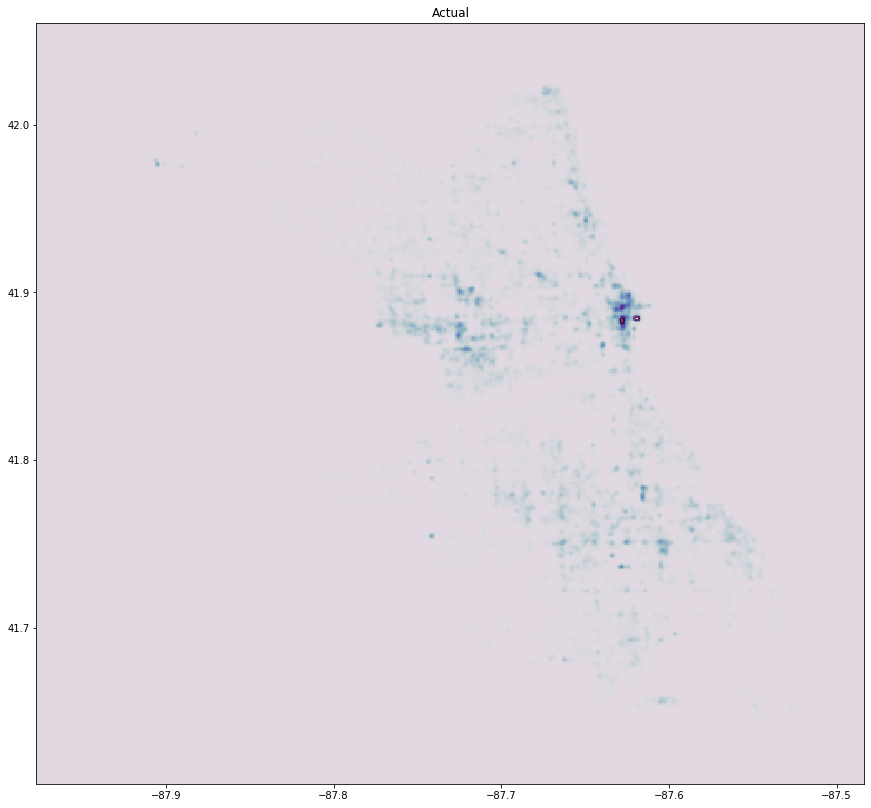

In [42]:
plt.figure(figsize=(18, 14))
plt.title('Actual')
plt.imshow( X=reshapePred(Y_valid), cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])